In [20]:
import datashader as ds, datashader.transfer_functions as tf, numpy as np
from datashader import spatial
from datashader.utils import lnglat_to_meters as webm
import pandas as pd

from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9
from IPython.core.display import HTML, display

display(HTML("<style>.container { width:95% !important; }</style>"))

In [22]:
df = pd.read_csv('output.csv')
df.columns = ['easting','northing','count','norm_count']
print("Size: {:,}".format(len(df)))
df.head()

Size: 604,220


,easting,northing,count,norm_count
0,-1.416164e+07,6.561966e+06,1,2
1,-1.416164e+07,6.560743e+06,1,2
2,-1.416286e+07,6.559520e+06,1,2
3,-1.416531e+07,6.558297e+06,10,17
4,-1.416286e+07,6.558297e+06,1,2


In [23]:
df.head()

,easting,northing,count,norm_count
0,-1.416164e+07,6.561966e+06,1,2
1,-1.416164e+07,6.560743e+06,1,2
2,-1.416286e+07,6.559520e+06,1,2
3,-1.416531e+07,6.558297e+06,10,17
4,-1.416286e+07,6.558297e+06,1,2


In [24]:
plot_width  = int(1200)
plot_height = int(800)
background = "black"


In [25]:
# NewYorkCity   = (( -74.39,  -73.44), (40.51, 40.91))
USA           = ((-124.72,  -66.95), (23.55, 50.06))

In [26]:
export = partial(export_image, background = background, export_path="export")

In [27]:
cvs = ds.Canvas(plot_width, plot_height, *webm(*USA))
agg = cvs.points(df, 'easting', 'northing', ds.max('norm_count'))

/usr/local/lib/python3.7/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


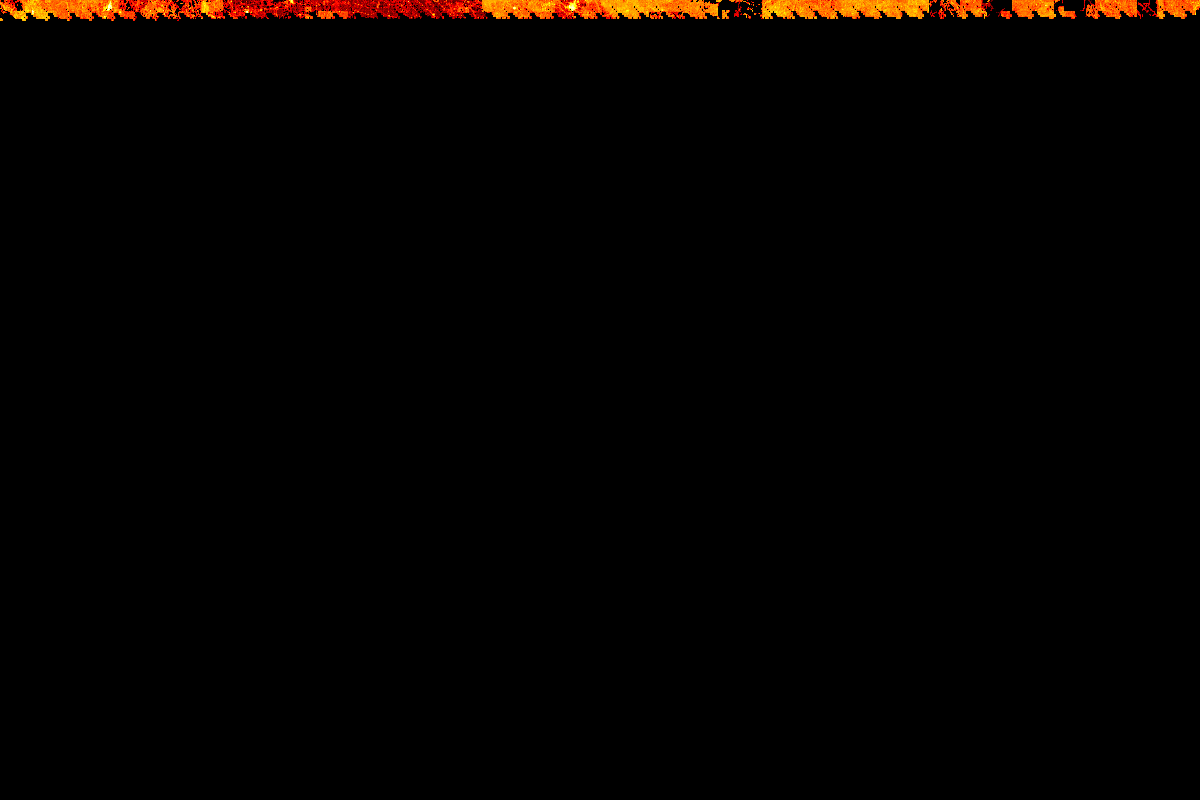

In [28]:
from matplotlib.cm import hot
export(tf.shade(agg, cmap = hot, how='log'),"USA")